In [54]:
!pip install keras numpy pandas matplotlib seaborn Pillow scikit-learn opencv-python flask flask-cors locust

print("✅ All packages installed!")

✅ All packages installed!



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
%matplotlib inline

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from pathlib import Path
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import joblib
import pickle

print("✅ All libraries imported!")

✅ All libraries imported!


In [57]:
folders = [
    "../data/train/cats",
    "../data/train/dogs", 
    "../data/test",
    "../models",
    "../data/uploads"
]

for folder in folders:
    Path(folder).mkdir(parents=True, exist_ok=True)

print("✅ Folder structure created!")
print("📁 Put your cat images in: data/train/cats/")
print("📁 Put your dog images in: data/train/dogs/")

✅ Folder structure created!
📁 Put your cat images in: data/train/cats/
📁 Put your dog images in: data/train/dogs/


In [58]:
from pathlib import Path
from PIL import Image
import numpy as np

def load_images(data_dir):
    cat_dir = data_dir / "cats"
    dog_dir = data_dir / "dogs"
    
    print(f"📁 Looking inside: {cat_dir} and {dog_dir}")
    
    images = []
    labels = []

    # Load cats
    cat_images = list(cat_dir.glob("*.jpg"))
    print(f"🔍 Found {len(cat_images)} cat images")
    for img_path in cat_images:
        try:
            img = Image.open(img_path).resize((64, 64))
            images.append(img)
            labels.append(0)  # cat
        except:
            print(f"❌ Could not read: {img_path}")

    # Load dogs
    dog_images = list(dog_dir.glob("*.jpg"))
    print(f"🔍 Found {len(dog_images)} dog images")
    for img_path in dog_images:
        try:
            img = Image.open(img_path).resize((64, 64))
            images.append(img)
            labels.append(1)  # dog
        except:
            print(f"❌ Could not read: {img_path}")

    print(f"✅ Loaded {len(images)} total images")
    print(f"   🐱 Cats: {labels.count(0)}")
    print(f"   🐶 Dogs: {labels.count(1)}")
    
    return images, labels

# ✅ Use the correct relative path from notebook/
data_dir = Path("../data/train")
images, labels = load_images(data_dir)

# 🧠 Convert PIL images to grayscale flattened feature vectors
X = np.array([np.array(img.convert("L")).flatten() for img in images])  # Grayscale flatten
y = np.array(labels)

# ✅ Debug prints
print("✅ Data prepared:")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique labels:", np.unique(y, return_counts=True))

# Optional: save the image paths if you use them later
image_paths = [str(p) for p in (list((data_dir / "cats").glob("*.jpg")) + list((data_dir / "dogs").glob("*.jpg")))]


📁 Looking inside: ..\data\train\cats and ..\data\train\dogs
🔍 Found 500 cat images
🔍 Found 500 dog images
✅ Loaded 1000 total images
   🐱 Cats: 500
   🐶 Dogs: 500
✅ Data prepared:
X shape: (1000, 4096)
y shape: (1000,)
Unique labels: (array([0, 1]), array([500, 500]))


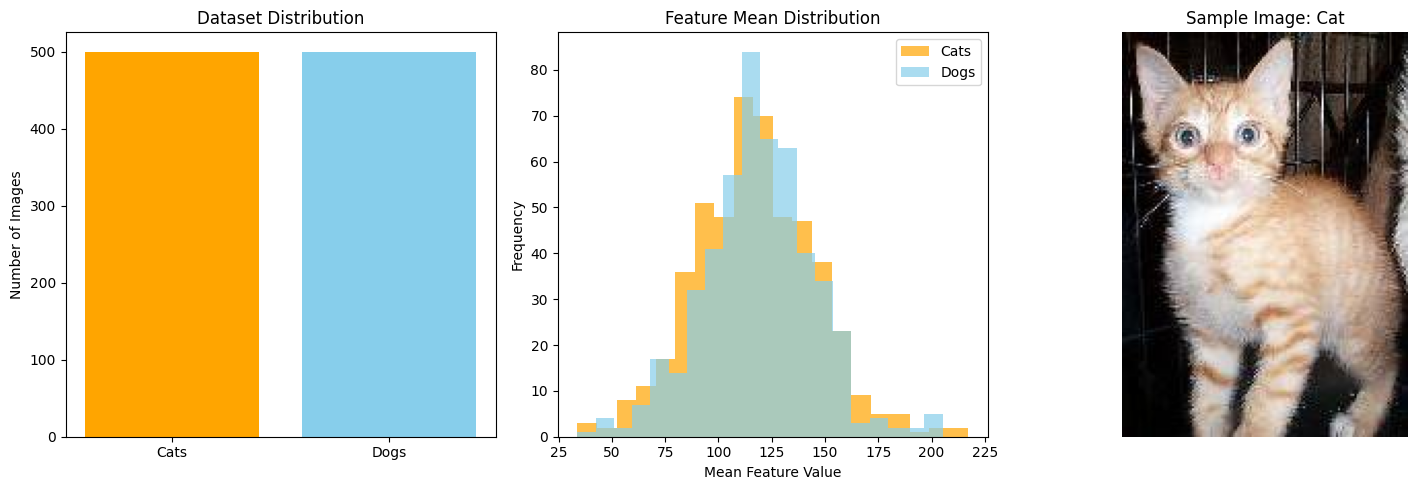

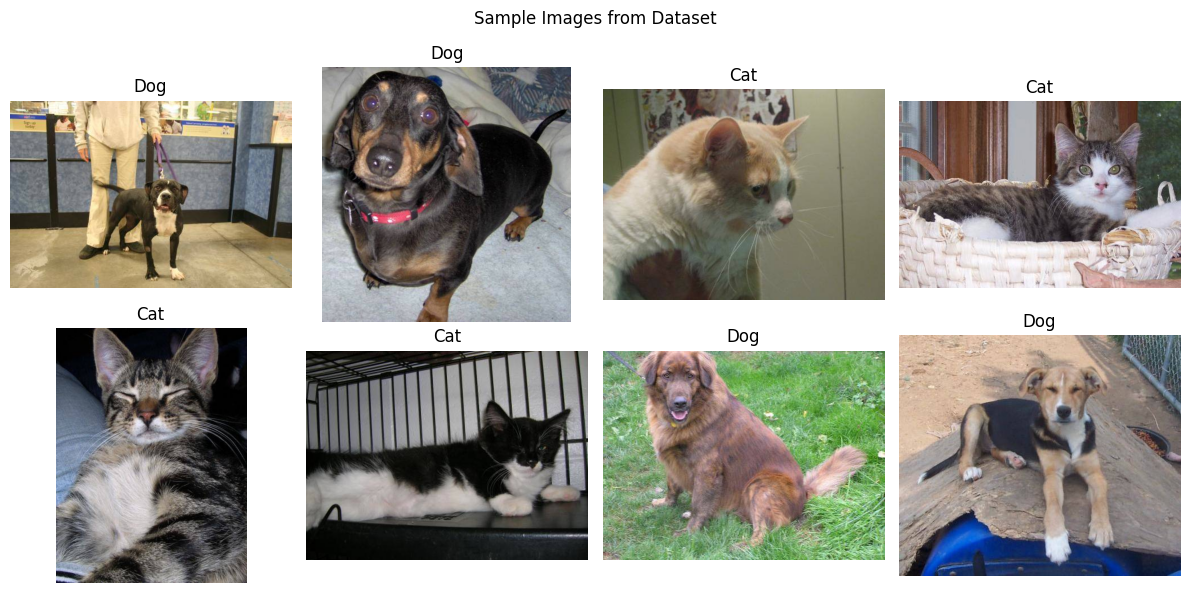

In [59]:
if len(X) > 0:
    # Show data distribution
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    labels_count = [sum(y == 0), sum(y == 1)]
    plt.bar(['Cats', 'Dogs'], labels_count, color=['orange', 'skyblue'])
    plt.title('Dataset Distribution')
    plt.ylabel('Number of Images')
    
    # Show feature distribution
    plt.subplot(1, 3, 2)
    plt.hist(X[y == 0].mean(axis=1), alpha=0.7, label='Cats', bins=20, color='orange')
    plt.hist(X[y == 1].mean(axis=1), alpha=0.7, label='Dogs', bins=20, color='skyblue')
    plt.title('Feature Mean Distribution')
    plt.xlabel('Mean Feature Value')
    plt.ylabel('Frequency')
    plt.legend()
    
    # Show sample images
    plt.subplot(1, 3, 3)
    # Load a random image for display
    sample_idx = np.random.randint(0, len(image_paths))
    sample_img = Image.open(image_paths[sample_idx])
    plt.imshow(sample_img)
    label_name = "Cat" if y[sample_idx] == 0 else "Dog"
    plt.title(f'Sample Image: {label_name}')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Show more sample images
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.ravel()
    
    sample_indices = np.random.choice(len(image_paths), 8, replace=False)
    
    for i, idx in enumerate(sample_indices):
        img = Image.open(image_paths[idx])
        axes[i].imshow(img)
        label_name = "Cat" if y[idx] == 0 else "Dog"
        axes[i].set_title(label_name)
        axes[i].axis('off')
    
    plt.suptitle('Sample Images from Dataset')
    plt.tight_layout()
    plt.show()


In [60]:
if len(X) > 0:
    # Split data: 70% train, 15% validation, 15% test
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"✅ Data split and scaled:")
    print(f"   Training: {len(X_train)} images")
    print(f"   Validation: {len(X_val)} images")
    print(f"   Test: {len(X_test)} images")
    print(f"   Features: {X_train.shape[1]}")

✅ Data split and scaled:
   Training: 700 images
   Validation: 150 images
   Test: 150 images
   Features: 4096


In [61]:
def create_models():
    """Create different ML models"""
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
        'SVM': SVC(kernel='rbf', random_state=42, probability=True),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Neural Network': MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
    }
    return models

if len(X) > 0:
    # Create models
    models = create_models()
    trained_models = {}
    model_scores = {}
    
    print("🚀 Training multiple models...")
    
    for name, model in models.items():
        print(f"\n🔄 Training {name}...")
        
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Evaluate on validation set
        val_score = model.score(X_val_scaled, y_val)
        model_scores[name] = val_score
        trained_models[name] = model
        
        print(f"✅ {name} - Validation Accuracy: {val_score:.4f}")
    
    # Find best model
    best_model_name = max(model_scores, key=model_scores.get)
    best_model = trained_models[best_model_name]
    
    print(f"\n🏆 Best Model: {best_model_name} (Accuracy: {model_scores[best_model_name]:.4f})")

🚀 Training multiple models...

🔄 Training Random Forest...
✅ Random Forest - Validation Accuracy: 0.6533

🔄 Training SVM...
✅ SVM - Validation Accuracy: 0.5467

🔄 Training Logistic Regression...
✅ Logistic Regression - Validation Accuracy: 0.4733

🔄 Training Neural Network...
✅ Neural Network - Validation Accuracy: 0.4533

🏆 Best Model: Random Forest (Accuracy: 0.6533)


In [62]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1000, 4096)
y shape: (1000,)


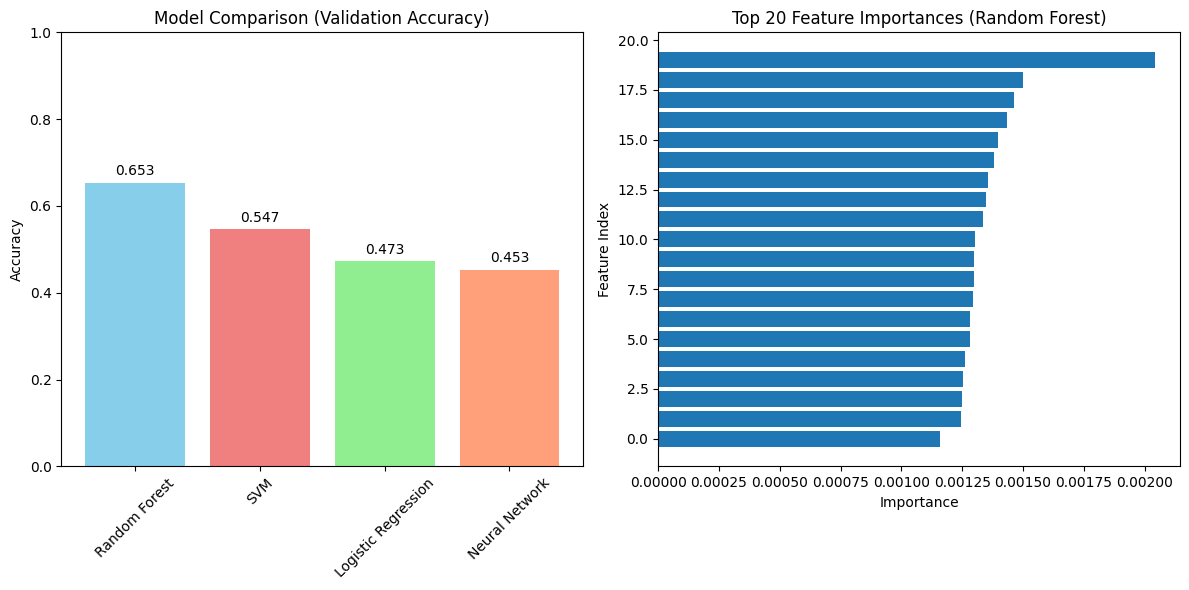

In [63]:
if 'model_scores' in locals():
    plt.figure(figsize=(12, 6))
    
    # Model comparison
    plt.subplot(1, 2, 1)
    models_list = list(model_scores.keys())
    scores_list = list(model_scores.values())
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']
    
    bars = plt.bar(models_list, scores_list, color=colors)
    plt.title('Model Comparison (Validation Accuracy)')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom')
    
    # Feature importance (for Random Forest)
    plt.subplot(1, 2, 2)
    if 'Random Forest' in trained_models:
        rf_model = trained_models['Random Forest']
        feature_importance = rf_model.feature_importances_
        
        # Plot top 20 features
        top_features = np.argsort(feature_importance)[-20:]
        plt.barh(range(20), feature_importance[top_features])
        plt.title('Top 20 Feature Importances (Random Forest)')
        plt.xlabel('Importance')
        plt.ylabel('Feature Index')
    
    plt.tight_layout()
    plt.show()


📊 Evaluating best model on test set...

✅ Test Accuracy: 0.6000

📋 Classification Report:
              precision    recall  f1-score   support

         Cat       0.59      0.65      0.62        75
         Dog       0.61      0.55      0.58        75

    accuracy                           0.60       150
   macro avg       0.60      0.60      0.60       150
weighted avg       0.60      0.60      0.60       150



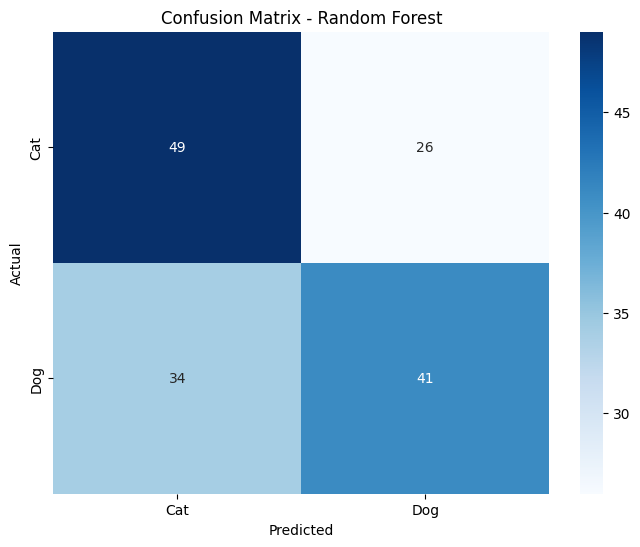

✅ Best model (Random Forest) and scaler saved!


In [65]:
if 'best_model' in locals():
    print("📊 Evaluating best model on test set...")
    
    # Make predictions
    y_pred = best_model.predict(X_test_scaled)
    y_pred_proba = best_model.predict_proba(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n✅ Test Accuracy: {accuracy:.4f}")
    
    # Classification report
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Save the best model and scaler
    joblib.dump(best_model, '../models/dog_cat_model.pkl')
    joblib.dump(scaler, '../models/scaler.pkl')
    print(f"✅ Best model ({best_model_name}) and scaler saved!")

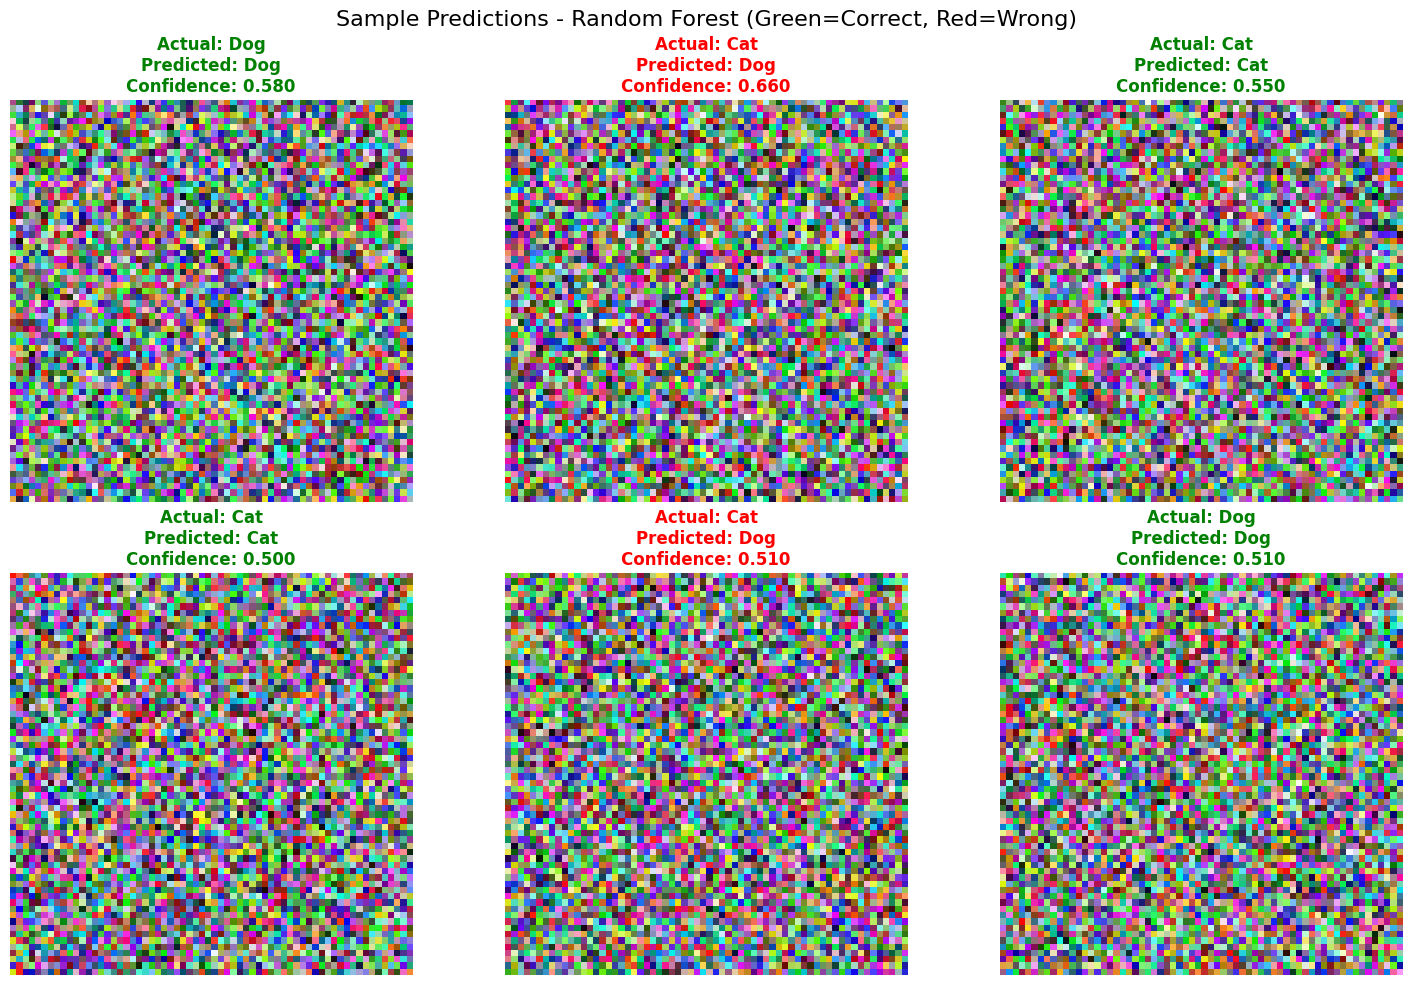

In [66]:
def predict_image_sklearn(model, scaler, image_path):
    """Predict a single image using sklearn model"""
    try:
        img = Image.open(image_path)
        img = img.convert('RGB')
        img_array = np.array(img)
        
        # Extract features
        features = extract_features(img_array)
        features_scaled = scaler.transform(features.reshape(1, -1))
        
        # Predict
        prediction = model.predict(features_scaled)[0]
        confidence = model.predict_proba(features_scaled)[0]
        
        if prediction == 1:
            return "Dog", confidence[1]
        else:
            return "Cat", confidence[0]
    except Exception as e:
        return "Error", 0

# Test on some sample images
if 'best_model' in locals() and len(image_paths) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    # Get test indices
    test_indices = np.random.choice(len(X_test), min(6, len(X_test)), replace=False)
    
    for i, test_idx in enumerate(test_indices):
        # Find corresponding image path (this is approximate since we split the data)
        actual_label = y_test[test_idx]
        
        # Get prediction
        pred_proba = best_model.predict_proba(X_test_scaled[test_idx].reshape(1, -1))[0]
        pred_label = best_model.predict(X_test_scaled[test_idx].reshape(1, -1))[0]
        
        # Create a sample image for display (using original features to reconstruct approximate image)
        # Since we can't perfectly reconstruct, we'll show a placeholder
        sample_img = np.random.randint(0, 255, (64, 64, 3), dtype=np.uint8)
        axes[i].imshow(sample_img)
        
        predicted = "Dog" if pred_label == 1 else "Cat"
        confidence = pred_proba[pred_label]
        actual = "Dog" if actual_label == 1 else "Cat"
        
        # Color based on correctness
        color = 'green' if predicted == actual else 'red'
        
        axes[i].set_title(f'Actual: {actual}\nPredicted: {predicted}\nConfidence: {confidence:.3f}', 
                        color=color, fontweight='bold')
        axes[i].axis('off')
    
    plt.suptitle(f'Sample Predictions - {best_model_name} (Green=Correct, Red=Wrong)', fontsize=16)
    plt.tight_layout()
    plt.show()